## Illustrating Statistics Explained "EU international trade in transport services"
[EU international trade in transport services](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=EU_international_trade_in_transport_services)

### Creating the right environment

1. Downloading all the usual packages you need to carry out the code

In [62]:
install.packages(c("ggplot2", "tidyr", "repr", "dplyr", "devtools", "restatapi"))

Installing packages into ‘/Users/francescasheeka/Library/R/3.6/library’
(as ‘lib’ is unspecified)



The downloaded binary packages are in
	/var/folders/3c/vlpk3btj78s78qfy006kq26h0000gn/T//RtmpVJVzq0/downloaded_packages


2. "Calling" the packages so that they are ready to be used in for this specific graphical representation

In [210]:
library(ggplot2)
library(tidyr)
library(repr)
library(dplyr)
library(devtools)
library(restatapi)

3. Installing the latest github version of restatapi (the code you will need to pull from the Eurostat database)

In [211]:
install_github("eurostat/restatapi")

Skipping install of 'restatapi' from a github remote, the SHA1 (ea80680d) has not changed since last install.
  Use `force = TRUE` to force installation


5. Ensures your version of restatapi is up-to-date

In [212]:
options(restatapi_update=TRUE)

## Figure 1: EU Trade in Transport Services with extra EU, 2010-2017

1. Here I pull the dataset I need (using the Eurostat Data Explorer). 'bop_its6_det' is the code to pull the International trade in services (since 2010) dataset. 

I can choose filters to extract the exact data I need. The filter codes can be found on the Eurostat Data Explorer by clicking on the '+'.





In [213]:
stk_flow_var <- c("CRE", "DEB", "BAL")

In [214]:
dataset_fig1 <- get_eurostat_data(id="bop_its6_det", 
                        filters = list(bop_item="SC", currency="MIO_EUR", partner="EXT_EU28",geo="EU28",stk_flow=stk_flow_var),
                        date_filter = "2010:2017")

2. dataset_fig1$time calls the 'time' variable in the dataset and changes the years from characters to numeric values

NB: This is important for line graphs 

In [215]:
dataset_fig1$time<-as.numeric(as.character(dataset_fig1$time))

3. Calls the 'values' variable and divides each of the values by 1000 so that I can make the y-axis of the graph "EUR 1000 million"

In [216]:
dataset_fig1$values<-dataset_fig1$values/1000

4. Allows you to get a quick sneak-peak of the data you've pulled (to see the whole dataset, just take out the 'head' and the brackets. 

In [217]:
head(dataset_fig1)

currency,bop_item,stk_flow,partner,geo,time,values
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
MIO_EUR,SC,BAL,EXT_EU28,EU28,2010,14.4300
MIO_EUR,SC,BAL,EXT_EU28,EU28,2011,19.6415
MIO_EUR,SC,BAL,EXT_EU28,EU28,2012,24.6189
MIO_EUR,SC,BAL,EXT_EU28,EU28,2013,21.4641
MIO_EUR,SC,BAL,EXT_EU28,EU28,2014,23.9547
MIO_EUR,SC,BAL,EXT_EU28,EU28,2015,27.4001


5. Here I'm changing the order of the factor levels so I can make sure the legend on the graph is in the correct order

In [218]:
dataset_fig1$stk_flow <- factor(dataset_fig1$stk_flow, levels = c("CRE", "DEB", "BAL"))

6. The line below allows you to control the size of your graph

In [219]:
options(repr.plot.width=10, repr.plot.height=5)

### 7. Line graph - Figure 1

ggplot2 allows you to visualise your data pretty efficiently. The first line calls the specific dataset you are using (the one you pulled using get_eurostat_data above!) and assigns the axes through 'aes'. The second line turns the graph into a line graph.

scale_y_continuous and scale_x_continuous: control the scales of your y and x axes.

ylab and xlab: control the labels for your axes. 

ggtitle: gives your graph a title. 

Your colours and legend labels can be added through scale_colour_manual - for my colours, I used a digital colour meter to extract the exact same sRGB colour codes used on the Statistics Explained website, but you can also simply replace these with "blue" or "green" and so on - as long as you're not too creative with your colour choices! 

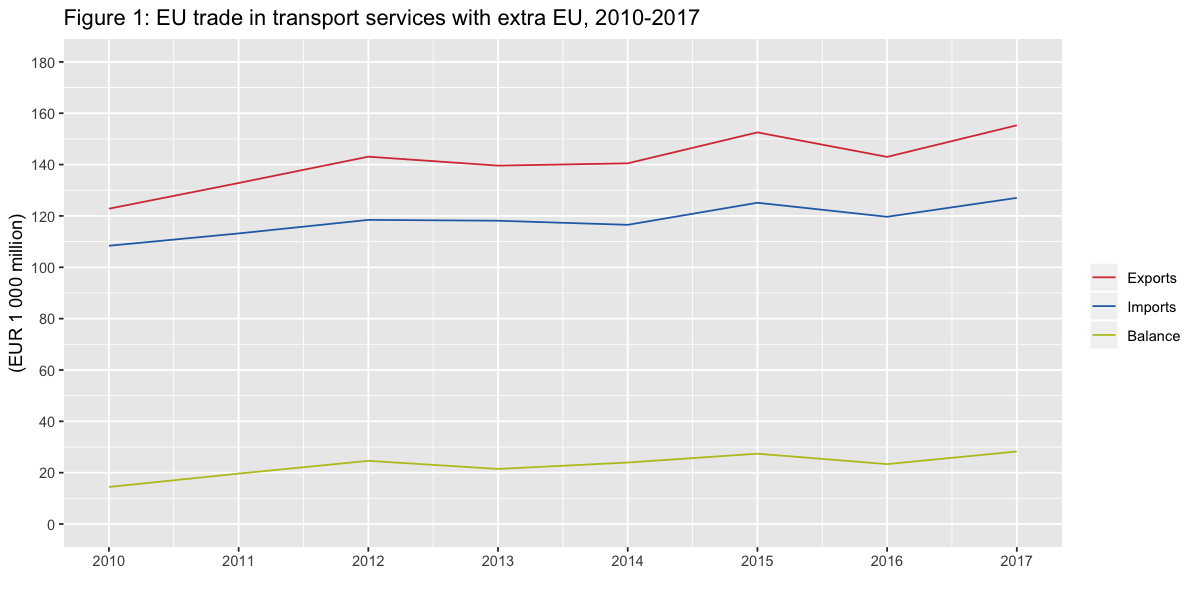

In [220]:
figure1 <- ggplot(data=dataset_fig1, aes(x=time, y=values, group=factor(stk_flow), color=factor(stk_flow))) + 
                      
geom_line() +

scale_color_manual(labels = c("Exports", "Imports", "Balance"), values = c("#D73C41", "#276EB4", "#B9C31E"), name = " ") +


  ggtitle("Figure 1: EU trade in transport services with extra EU, 2010-2017") +
  
  scale_y_continuous(limits = c(0, 180), breaks = seq(0, 180, by = 20)) +
  scale_x_continuous(limits = c(2010, 2017), breaks = seq(2010, 2017, by = 1)) +
  
  ylab("(EUR 1 000 million)") +
  xlab(" ")  

print(figure1)

## Figure 2 - Contributions of sea, air, other modes of transport as well as postal and courier services to exports of EU-28 with extra-EU, 2010-2017 (EUR 1 000 million) 



1. Pulling the relevant data for this chart in the same way as I did in Figure 1

In [221]:
id="bop_its6_det"

bop <- c("SC1", "SC2", "SC4", "SC3")

dataset_fig2 <-  get_eurostat_data(id, 
                                filters = list(bop_item=bop, currency="MIO_EUR", partner="EXT_EU28",geo="EU28",stk_flow="CRE"),
                                date_filter = "2010:2017")






2. Calls the 'values' variable and divides each of the values by 1000 so that I can make the y-axis of the graph "EUR 1000 million"

In [222]:
dataset_fig2$values<-dataset_fig2$values/1000


3. A quick look at the dataset we just made

In [223]:
head(dataset_fig2)

currency,bop_item,stk_flow,partner,geo,time,values
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
MIO_EUR,SC1,CRE,EXT_EU28,EU28,2010,67.2471
MIO_EUR,SC1,CRE,EXT_EU28,EU28,2011,71.3135
MIO_EUR,SC1,CRE,EXT_EU28,EU28,2012,75.7697
MIO_EUR,SC1,CRE,EXT_EU28,EU28,2013,74.8810
MIO_EUR,SC1,CRE,EXT_EU28,EU28,2014,73.8670
MIO_EUR,SC1,CRE,EXT_EU28,EU28,2015,81.1496


4. Changing the order of the factor levels so I can make sure the values are in the correct order for the stacked bar chart

In [224]:
dataset_fig2$bop_item <- factor(dataset_fig2$bop_item, levels = c("SC4", "SC3", "SC2", "SC1"))

5. Stacked bar chart  - Figure 2

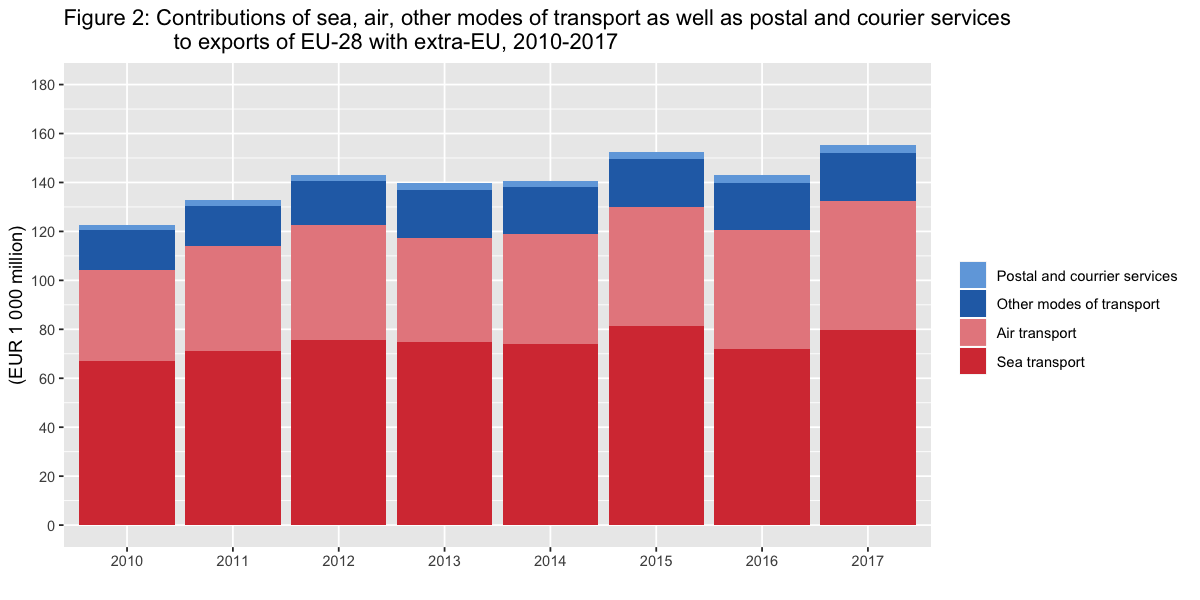

In [225]:
options(repr.plot.width=10, repr.plot.height=5)

figure2 <- ggplot(data=dataset_fig2, aes(x = time, y = values, fill = bop_item)) +
  geom_bar(stat="identity")+scale_fill_manual(values = c("#71A8DF","#276EB4", "#E78A8D", "#D73C41"), 
                                              labels = c("Postal and courrier services", "Other modes of transport", "Air transport", "Sea transport"),
                                             name = " ") +

ggtitle("Figure 2: Contributions of sea, air, other modes of transport as well as postal and courier services
                  to exports of EU-28 with extra-EU, 2010-2017") +

scale_y_continuous(limits = c(0, 180), breaks = seq(0, 180, by = 20))  +

ylab("(EUR 1 000 million)") +
xlab(" ")  

print(figure2)


### Figure 3 "Contributions of sea, air, other modes of transport as well as postal and courier services to imports of EU-28 with extra-EU, 2010-2017"

The same as Figure 2 but visualising imports instead of exports

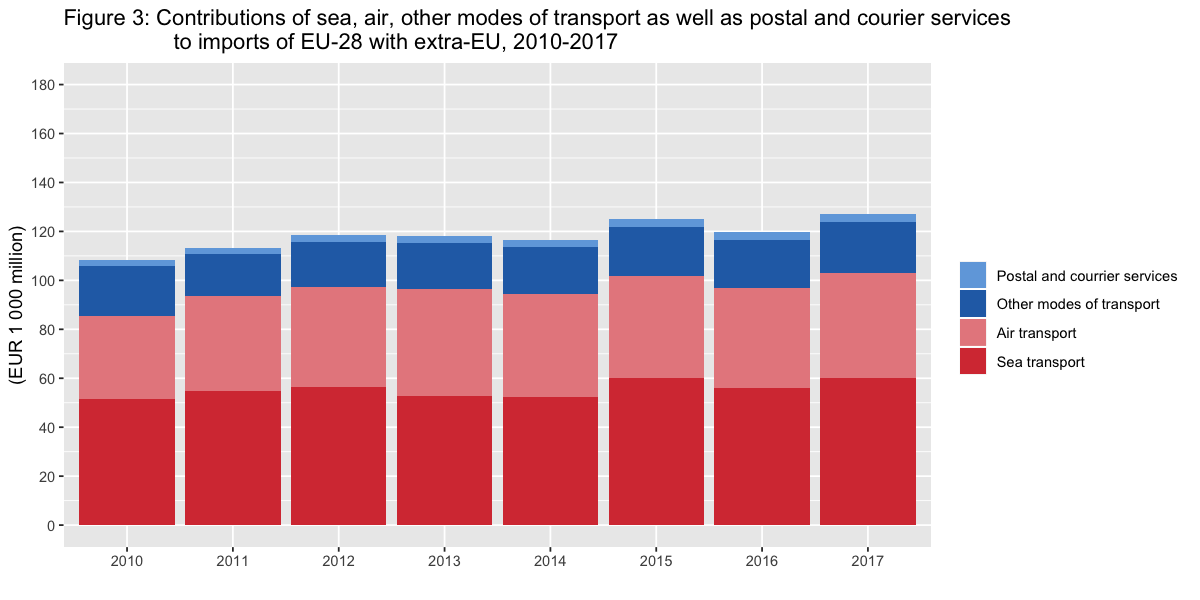

In [226]:
id="bop_its6_det"

bop <- c("SC1", "SC2", "SC4", "SC3")

dataset_fig3 <-  get_eurostat_data(id, 
                                filters = list(bop_item=bop, currency="MIO_EUR", partner="EXT_EU28",geo="EU28",stk_flow="DEB"),
                                date_filter = "2010:2017")

dataset_fig3$values<-dataset_fig3$values/1000

dataset_fig3$bop_item <- factor(dataset_fig3$bop_item, levels = c("SC4", "SC3", "SC2", "SC1"))

options(repr.plot.width=10, repr.plot.height=5)

figure3 <- ggplot(data=dataset_fig3, aes(x = time, y = values, fill = bop_item)) +
  geom_bar(stat="identity")+scale_fill_manual(values = c("#71A8DF","#276EB4", "#E78A8D", "#D73C41"), 
                                              labels = c("Postal and courrier services", "Other modes of transport", "Air transport", "Sea transport"),
                                             name = " ") +

ggtitle("Figure 3: Contributions of sea, air, other modes of transport as well as postal and courier services
                  to imports of EU-28 with extra-EU, 2010-2017") +

scale_y_continuous(limits = c(0, 180), breaks = seq(0, 180, by = 20))  +

ylab("(EUR 1 000 million)") +
xlab(" ")  

print(figure3)



## Figure 4 - Main trading partners' share of EU exports in transport services, 2017 



In [227]:
id="bop_its6_det"




1. Since there is an "other" category in the graph on Statistics Explained, I tried my best to call all the values in the dataset that could be defined as "other"


In [228]:
other_ctries <- c('IS', 'LI', 'ME', 'MK', 'AL', 'RS', 'TR', 'AD', 'BY', 'BA', 'MD', 'SM', 'UA', 'VA', 'AFR', 'AG', 'BS', 'BB', 'BQ', 'CU', 'CW', 'DM', 'DO', 'GD', 'HT', 'JM', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'VI', 'BZ', 'CR', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'AR', 'BO', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'MO', 'MN', 'KP', 'KR', 'TW', 'AF', 'BD', 'BT', 'IR', 'MV', 'NP', 'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG', 'TH', 'TL', 'NM', 'AM', 'AZ', 'BH', 'GE', 'IQ', 'IL', 'JO', 'KW', 'LB', 'PS', 'OM', 'QA', 'SA', 'SY', 'AE', 'YE', 'OCE_PLR')



2. Pulling the data for the "other" countries

In [229]:
dataset_fig4_1 <- get_eurostat_data(id, 
                             filters = list(bop_item="SC", currency="MIO_EUR", partner= other_ctries,
                             geo="EU28",stk_flow="CRE"),
                             date_filter = "2017", stringsAsFactors = FALSE)

3. Defining all of the countries I just called as "OT" for sake of ease 


In [230]:
dataset_fig4_1$partner[dataset_fig4_1$partner %in% other_ctries]<-"OT"

4. Adding the other countries' values into the dataset I already created for the 'other' countries 

In [231]:
main_partners <- c('HK', 'IN', 'CA', 'BR', 'JP', 'NO', 'RU', 'CN_X_HK', 'CH', 'US')


In [232]:
dataset_fig4_2 <- rbind(dataset_fig4_1, get_eurostat_data(id, 
                                            filters = list(bop_item="SC", currency="MIO_EUR", partner=main_partners,
                                            geo="EU28",stk_flow="CRE"),
                                            date_filter = "2017", stringsAsFactors = FALSE))

5. Changing the order of the chart using mutate and then ordering the levels

In [233]:
figure4 <- dataset_fig4_2 %>% mutate (partner = factor(x=partner, levels=unique(partner))) %>% arrange(match(partner, c('OT', 'HK', 'IN', 'CA', 'BR', 'JP', 'NO', 'RU', 'CN_X_HK', 'CH', 'US')))
figure4$partner <- factor(figure4$partner, levels = c('OT', 'HK', 'IN', 'CA', 'BR', 'JP', 'NO', 'RU', 'CN_X_HK', 'CH', 'US'))

6. Pie Chart - Figure 3

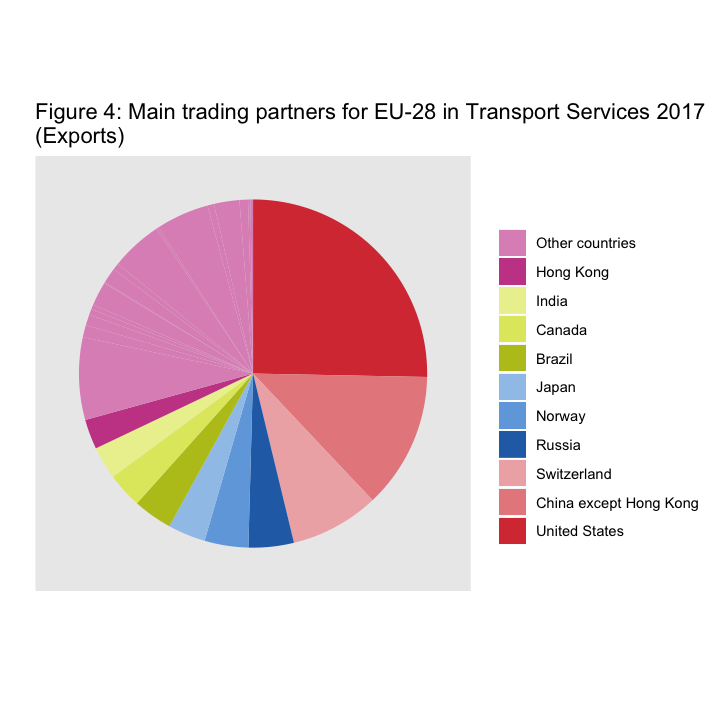

In [282]:
options(repr.plot.width=6, repr.plot.height=6)


#Making the pie chart
figure4_graph_1 <- ggplot(figure4, mapping = aes(x= "", y=values, fill=partner)) +
  geom_bar(stat="identity", width=1) +
#The following line makes this graph a pie chart
  coord_polar("y", start=0) +
#Title
ggtitle("Figure 4: Main trading partners for EU-28 in Transport Services 2017
(Exports)") +

#Below removes the circular coordinate automatically generated when making a pie chart in ggplot
theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid  = element_blank())+

#Axes labels
ylab(" ") +
xlab(" ") 

#Adding the colours
figure4_final <- figure4_graph_1 + scale_fill_manual(values=c("#DE93C0", "#C84B96", "#EBf09C", "#E1E86B", "#B9C31E", "#A0C5EA", "#71A8DF", "#276EB4", "#EFB1B3", "#E78A8D", "#D73C41"), labels = c("Other countries", "Hong Kong", "India", "Canada", "Brazil","Japan","Norway", "Russia", "Switzerland", "China except Hong Kong", "United States"),
                                             name = " ")

figure4_final

### Figure 4 (cont): Main trading partners' share of EU imports of transport services, 2017 

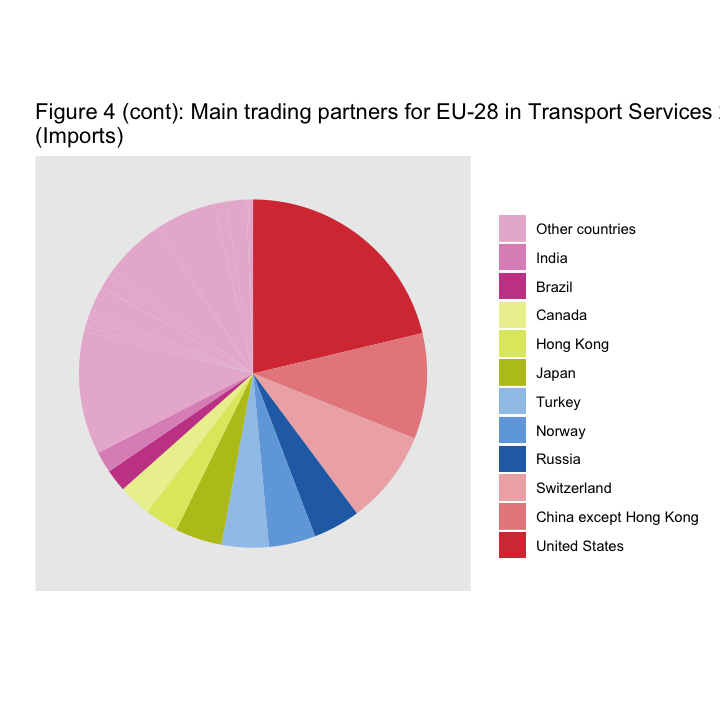

In [283]:
other_ctries_2 <- c('IS', 'LI', 'ME', 'MK', 'AL', 'RS', 'AD', 'BY', 'BA', 'MD', 'SM', 'UA', 'VA', 'AFR', 'AG', 'BS', 'BB', 'BQ', 'CU', 'CW', 'DM', 'DO', 'GD', 'HT', 'JM', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'VI', 'BZ', 'CR', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'AR', 'BO', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'MO', 'MN', 'KP', 'KR', 'TW', 'AF', 'BD', 'BT', 'IR', 'MV', 'NP', 'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG', 'TH', 'TL', 'NM', 'AM', 'AZ', 'BH', 'GE', 'IQ', 'IL', 'JO', 'KW', 'LB', 'PS', 'OM', 'QA', 'SA', 'SY', 'AE', 'YE', 'OCE_PLR')

dataset_fig4_2_1 <- get_eurostat_data(id, 
                             filters = list(bop_item="SC", currency="MIO_EUR", partner= other_ctries_2,
                             geo="EU28",stk_flow="DEB"),
                             date_filter = "2017", stringsAsFactors = FALSE)

dataset_fig4_2_1$partner[dataset_fig4_2_1$partner %in% other_ctries_2]<-"OT"

main_partners_2 <- c('HK', 'IN', 'CA', 'TR','BR', 'JP', 'NO', 'RU', 'CN_X_HK', 'CH', 'US')

dataset_fig4_2_2 <- rbind(dataset_fig4_2_1, get_eurostat_data(id, 
                                            filters = list(bop_item="SC", currency="MIO_EUR", partner=main_partners_2,
                                            geo="EU28",stk_flow="DEB"),
                                            date_filter = "2017", stringsAsFactors = FALSE))

figure4_2 <- dataset_fig4_2_2 %>% mutate (partner = factor(x=partner, levels=unique(partner))) %>% arrange(match(partner, c('OT', 'IN', 'BR', 'CA', 'HK', 'JP', 'TR', 'NO', 'RU', 'CH', 'CN_X_HK', 'US')))

figure4_2$partner <- factor(figure4_2$partner, levels = c('OT', 'IN', 'BR', 'CA', 'HK', 'JP', 'TR', 'NO', 'RU', 'CH', 'CN_X_HK', 'US'))


#Chart! 
options(repr.plot.width=6, repr.plot.height=6)

#Pie
figure4_graph_2 <- ggplot(figure4_2, mapping = aes(x= "", y=values, fill=partner)) +
  geom_bar(stat="identity", width=1) +
#The following line makes this graph a pie chart
  coord_polar("y", start=0) +
#Title
ggtitle("Figure 4 (cont): Main trading partners for EU-28 in Transport Services 2017
(Imports)") +

#Below removes the circular coordinate automatically generated when making a pie chart in ggplot
theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid  = element_blank())+

#Axes labels
ylab(" ") +
xlab(" ") 

#Adding the colours
figure4_2_final <- figure4_graph_2 + scale_fill_manual(values=c("#E9B7D4", "#DE93C0", "#C84B96", "#EBf09C", "#E1E86B", "#B9C31E", "#A0C5EA", "#71A8DF", "#276EB4", "#EFB1B3", "#E78A8D", "#D73C41"), labels = c("Other countries", "India", "Brazil", "Canada", "Hong Kong","Japan","Turkey", "Norway", "Russia", "Switzerland", "China except Hong Kong", "United States"),
                                             name = " ")

figure4_2_final

# The graphs below are the rest of the figures on the Statistics Explained 'EU internatonal trade in transport' page, using the same code for the line graphs and pie charts above. 



### Figure 5: Evolution of sea transport services trade for EU-28, 2010-2017 (EUR 1 000 million) 

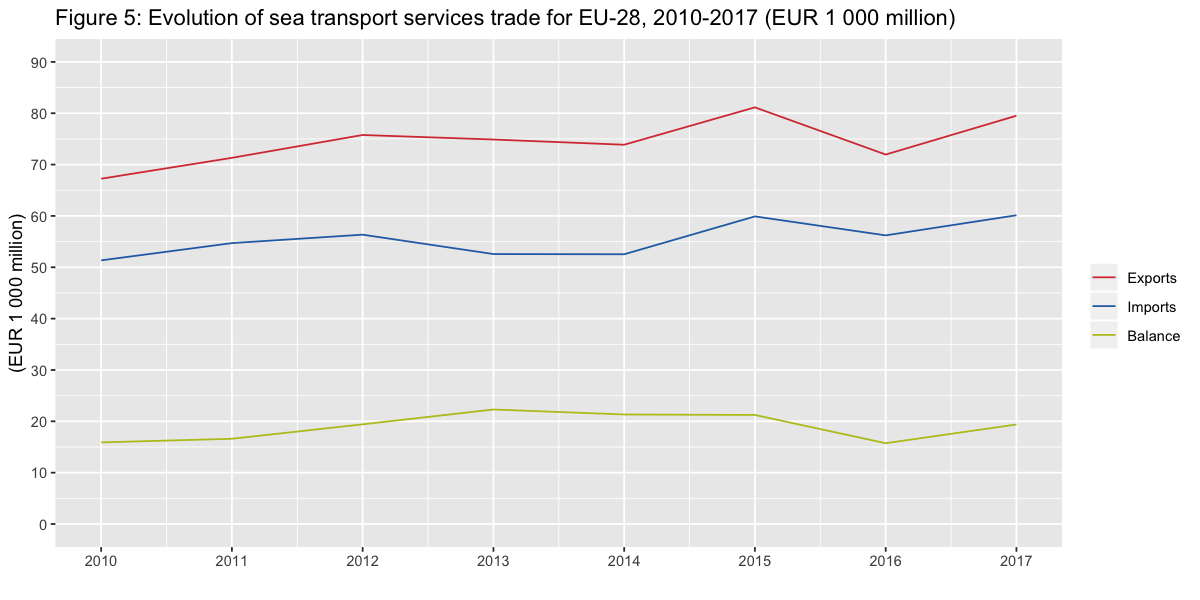

In [236]:
stk_flow_var <- c("CRE", "DEB", "BAL")

dataset_fig5 <- get_eurostat_data(id="bop_its6_det", 
                        filters = list(bop_item="SC1", currency="MIO_EUR", partner="EXT_EU28",geo="EU28",stk_flow=stk_flow_var),
                        date_filter = "2010:2017")

dataset_fig5$time<-as.numeric(as.character(dataset_fig5$time))

dataset_fig5$values<-dataset_fig5$values/1000

dataset_fig5$stk_flow <- factor(dataset_fig5$stk_flow, levels = c("CRE", "DEB", "BAL"))

options(repr.plot.width=10, repr.plot.height=5)

figure5 <- ggplot(data=dataset_fig5, aes(x=time, y=values, group=factor(stk_flow), color=factor(stk_flow))) + 
                      
geom_line() +

scale_color_manual(labels = c("Exports", "Imports", "Balance"), values = c("#D73C41", "#276EB4", "#B9C31E"), name = " ") +


  ggtitle("Figure 5: Evolution of sea transport services trade for EU-28, 2010-2017 (EUR 1 000 million)") +
  
  scale_y_continuous(limits = c(0, 90), breaks = seq(0, 90, by = 10)) +
  scale_x_continuous(limits = c(2010, 2017), breaks = seq(2010, 2017, by = 1)) +
  
  ylab("(EUR 1 000 million)") +
  xlab(" ")  

print(figure5)


### Figure 6: Main trading partners' share of EU exports and imports of sea transport services, 2017 

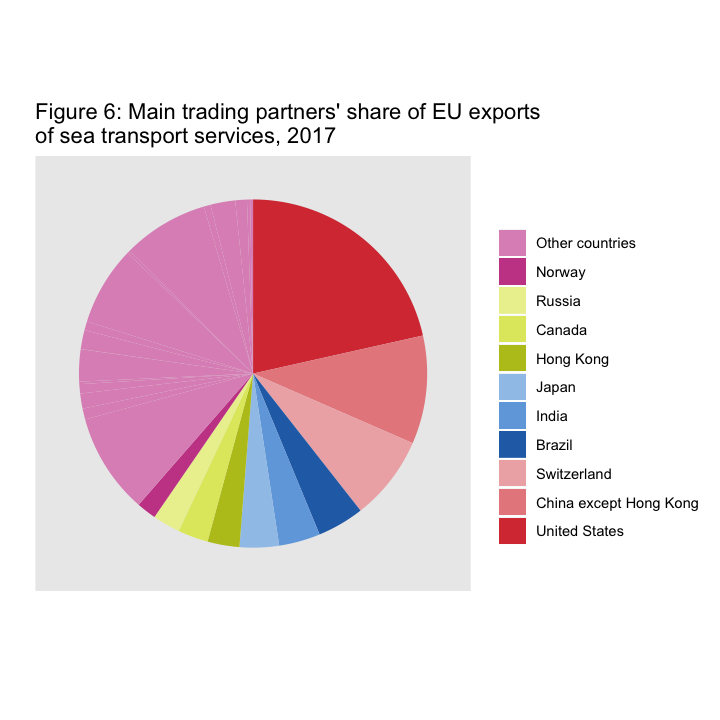

In [262]:
other_ctries_6_1 <- c('IS', 'LI', 'ME', 'MK', 'TR', 'AL', 'RS', 'AD', 'BY', 'BA', 'MD', 'SM', 'UA', 'VA', 'AFR', 'AG', 'BS', 'BB', 'BQ', 'CU', 'CW', 'DM', 'DO', 'GD', 'HT', 'JM', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'VI', 'BZ', 'CR', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'AR', 'BO', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'MO', 'MN', 'KP', 'KR', 'TW', 'AF', 'BD', 'BT', 'IR', 'MV', 'NP', 'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG', 'TH', 'TL', 'NM', 'AM', 'AZ', 'BH', 'GE', 'IQ', 'IL', 'JO', 'KW', 'LB', 'PS', 'OM', 'QA', 'SA', 'SY', 'AE', 'YE', 'OCE_PLR')

dataset_fig6_1 <- get_eurostat_data(id, 
                             filters = list(bop_item="SC1", currency="MIO_EUR", partner= other_ctries_6_1,
                             geo="EU28",stk_flow="CRE"),
                             date_filter = "2017", stringsAsFactors = FALSE)

dataset_fig6_1$partner[dataset_fig6_1$partner %in% other_ctries_6_1]<-"OT"

main_partners_6_1 <- c('NO', 'RU', 'CA', 'HK', 'JP', 'IN', 'BR', 'CH', 'CN_X_HK', 'US')

dataset_fig6_1_1 <- rbind(dataset_fig6_1, get_eurostat_data(id, 
                                            filters = list(bop_item="SC1", currency="MIO_EUR", partner=main_partners_6_1,
                                            geo="EU28",stk_flow="CRE"),
                                            date_filter = "2017", stringsAsFactors = FALSE))

figure6_1 <- dataset_fig6_1_1 %>% mutate (partner = factor(x=partner, levels=unique(partner))) %>% arrange(match(partner, c('OT', 'NO', 'RU', 'CA', 'HK', 'JP', 'IN', 'BR', 'CH', 'CN_X_HK', 'US')))

figure6_1$partner <- factor(figure6_1$partner, levels = c('OT', 'NO', 'RU', 'CA', 'HK', 'JP', 'IN', 'BR', 'CH', 'CN_X_HK', 'US'))

#Chart! 
options(repr.plot.width=6, repr.plot.height=6)

#Pie
figure6_graph_1 <- ggplot(figure6_1, mapping = aes(x= "", y=values, fill=partner)) +
  geom_bar(stat="identity", width=1) +
#The following line makes this graph a pie chart
  coord_polar("y", start=0) +
#Title
ggtitle("Figure 6: Main trading partners' share of EU exports 
of sea transport services, 2017") +

#Below removes the circular coordinate automatically generated when making a pie chart in ggplot
theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid  = element_blank())+

#Axes labels
ylab(" ") +
xlab(" ") 

#Adding the colours
figure6_1_final <- figure6_graph_1 + scale_fill_manual(values=c("#DE93C0", "#C84B96", "#EBf09C", "#E1E86B", "#B9C31E", "#A0C5EA", "#71A8DF", "#276EB4", "#EFB1B3", "#E78A8D", "#D73C41"), labels = c("Other countries", "Norway", "Russia", "Canada", "Hong Kong","Japan", "India", "Brazil", "Switzerland", "China except Hong Kong", "United States"),
                                             name = " ")

figure6_1_final

### Figure 6 (cont): Main trading partners' share of EU exports and imports of sea transport services, 2017

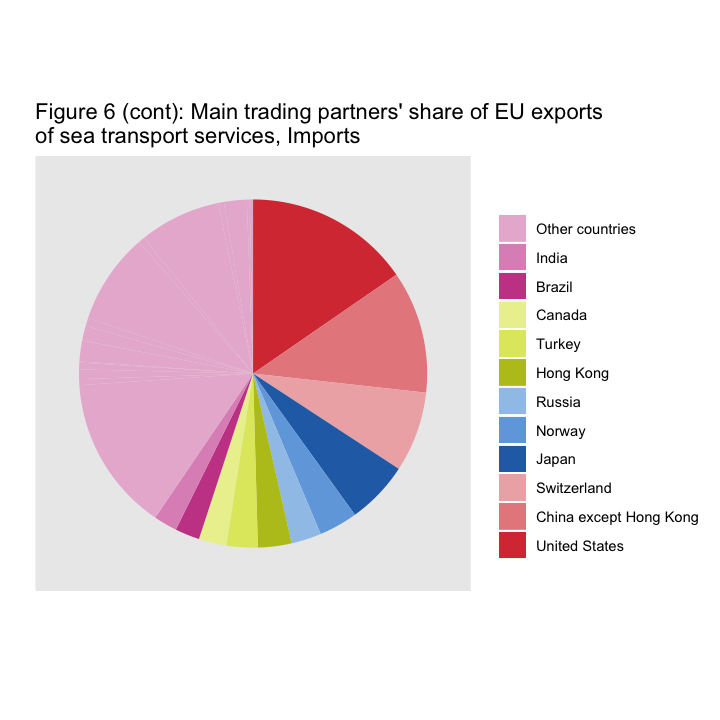

In [263]:
other_ctries_6_2 <- c('IS', 'LI', 'ME', 'MK', 'AL', 'RS', 'AD', 'BY', 'BA', 'MD', 'SM', 'UA', 'VA', 'AFR', 'AG', 'BS', 'BB', 'BQ', 'CU', 'CW', 'DM', 'DO', 'GD', 'HT', 'JM', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'VI', 'BZ', 'CR', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'AR', 'BO', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'MO', 'MN', 'KP', 'KR', 'TW', 'AF', 'BD', 'BT', 'IR', 'MV', 'NP', 'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG', 'TH', 'TL', 'NM', 'AM', 'AZ', 'BH', 'GE', 'IQ', 'IL', 'JO', 'KW', 'LB', 'PS', 'OM', 'QA', 'SA', 'SY', 'AE', 'YE', 'OCE_PLR')

dataset_fig6_2<- get_eurostat_data(id, 
                             filters = list(bop_item="SC1", currency="MIO_EUR", partner=other_ctries_6_2,
                             geo="EU28",stk_flow="DEB"),
                             date_filter = "2017", stringsAsFactors = FALSE)

dataset_fig6_2$partner[dataset_fig6_2$partner %in% other_ctries_6_2]<-"OT"

main_partners_6_2 <- c('OT', 'IN', 'BR', 'CA', 'TR', 'HK', 'RU', 'NO', 'JP', 'CH', 'CN_X_HK', 'US')

dataset_fig6_2_2 <- rbind(dataset_fig6_2, get_eurostat_data(id, 
                                            filters = list(bop_item="SC1", currency="MIO_EUR", partner=main_partners_6_2,
                                            geo="EU28",stk_flow="DEB"),
                                            date_filter = "2017", stringsAsFactors = FALSE))

figure6_2 <- dataset_fig6_2_2 %>% mutate (partner = factor(x=partner, levels=unique(partner))) %>% arrange(match(partner, c('OT', 'IN', 'BR', 'CA', 'TR', 'HK', 'RU', 'NO', 'JP', 'CH', 'CN_X_HK', 'US')))

figure6_2$partner <- factor(figure6_2$partner, levels = c('OT', 'IN', 'BR', 'CA', 'TR', 'HK', 'RU', 'NO', 'JP', 'CH', 'CN_X_HK', 'US'))


#Chart! 
options(repr.plot.width=6, repr.plot.height=6)

#Pie
figure6_graph_2 <- ggplot(figure6_2, mapping = aes(x= "", y=values, fill=partner)) +
  geom_bar(stat="identity", width=1) +
#The following line makes this graph a pie chart
  coord_polar("y", start=0) +
#Title
ggtitle("Figure 6 (cont): Main trading partners' share of EU imports 
of sea transport services") +

#Below removes the circular coordinate automatically generated when making a pie chart in ggplot
theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid  = element_blank())+

#Axes labels
ylab(" ") +
xlab(" ") 

#Adding the colours
figure6_2_final <- figure6_graph_2 + scale_fill_manual(values=c("#E9B7D4", "#DE93C0", "#C84B96", "#EBf09C", "#E1E86B", "#B9C31E", "#A0C5EA", "#71A8DF", "#276EB4", "#EFB1B3", "#E78A8D", "#D73C41"), labels = c("Other countries", "India", "Brazil", "Canada", "Turkey", "Hong Kong","Russia", "Norway", "Japan", "Switzerland", "China except Hong Kong", "United States"),
                                             name = " ")

figure6_2_final

### Figure 7: Evolution of air transport services trade for EU-28, 2010-2017 (EUR 1 000 million) 

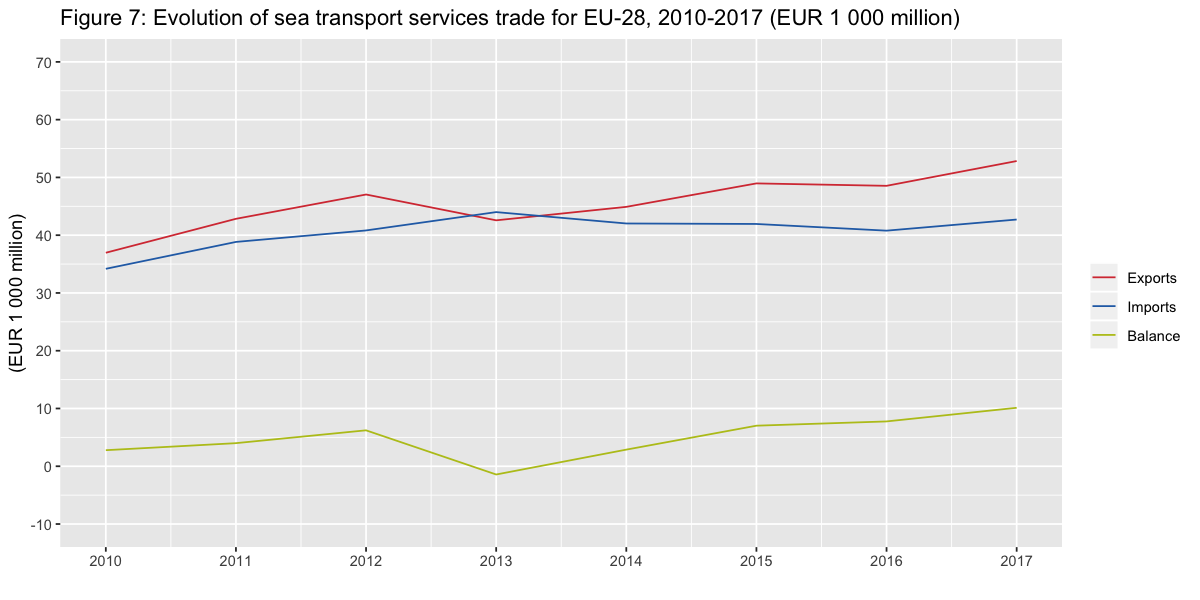

In [237]:
stk_flow_var <- c("CRE", "DEB", "BAL")

dataset_fig7 <- get_eurostat_data(id="bop_its6_det", 
                        filters = list(bop_item="SC2", currency="MIO_EUR", partner="EXT_EU28",geo="EU28",stk_flow=stk_flow_var),
                        date_filter = "2010:2017")

dataset_fig7$time<-as.numeric(as.character(dataset_fig7$time))

dataset_fig7$values<-dataset_fig7$values/1000

dataset_fig7$stk_flow <- factor(dataset_fig7$stk_flow, levels = c("CRE", "DEB", "BAL"))

options(repr.plot.width=10, repr.plot.height=5)

figure7 <- ggplot(data=dataset_fig7, aes(x=time, y=values, group=factor(stk_flow), color=factor(stk_flow))) + 
                      
geom_line() +

scale_color_manual(labels = c("Exports", "Imports", "Balance"), values = c("#D73C41", "#276EB4", "#B9C31E"), name = " ") +


  ggtitle("Figure 7: Evolution of sea transport services trade for EU-28, 2010-2017 (EUR 1 000 million)") +
  
  scale_y_continuous(limits = c(-10, 70), breaks = seq(-10, 70, by = 10)) +
  scale_x_continuous(limits = c(2010, 2017), breaks = seq(2010, 2017, by = 1)) +
  
  ylab("(EUR 1 000 million)") +
  xlab(" ")  

print(figure7)



### Figure 8: Main trading partners' share of EU exports and imports of air transport services, 2017 

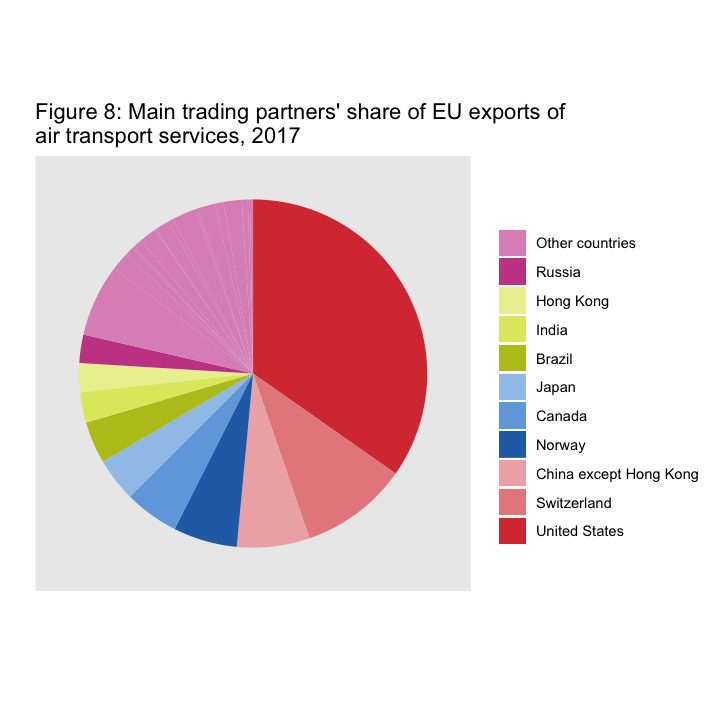

In [268]:
other_ctries_8_1 <- c('IS', 'LI', 'ME', 'MK', 'TR', 'AL', 'RS', 'AD', 'BY', 'BA', 'MD', 'SM', 'UA', 'VA', 'AFR', 'AG', 'BS', 'BB', 'BQ', 'CU', 'CW', 'DM', 'DO', 'GD', 'HT', 'JM', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'VI', 'BZ', 'CR', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'AR', 'BO', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'MO', 'MN', 'KP', 'KR', 'TW', 'AF', 'BD', 'BT', 'IR', 'MV', 'NP', 'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG', 'TH', 'TL', 'NM', 'AM', 'AZ', 'BH', 'GE', 'IQ', 'IL', 'JO', 'KW', 'LB', 'PS', 'OM', 'QA', 'SA', 'SY', 'AE', 'YE', 'OCE_PLR')

dataset_fig8_1_1 <- get_eurostat_data(id, 
                             filters = list(bop_item="SC2", currency="MIO_EUR", partner= other_ctries_8_1,
                             geo="EU28",stk_flow="CRE"),
                             date_filter = "2017", stringsAsFactors = FALSE)

dataset_fig8_1_1$partner[dataset_fig8_1_1$partner %in% other_ctries_8_1]<-"OT"

main_partners8_1 <- c('HK', 'IN', 'CA','BR', 'JP', 'NO', 'RU', 'CN_X_HK', 'CH', 'US')

dataset_fig8_1_2 <- rbind(dataset_fig8_1_1, get_eurostat_data(id, 
                                            filters = list(bop_item="SC2", currency="MIO_EUR", partner=main_partners8_1,
                                            geo="EU28",stk_flow="CRE"),
                                            date_filter = "2017", stringsAsFactors = FALSE))

figure8_1 <- dataset_fig8_1_2 %>% mutate (partner = factor(x=partner, levels=unique(partner))) %>% arrange(match(partner, c('OT', 'RU', 'HK', 'IN', 'BR', 'JP', 'CA', 'NO', 'CN_X_HK', 'CH','US')))

figure8_1$partner <- factor(figure8_1$partner, levels = c('OT', 'RU', 'HK', 'IN', 'BR', 'JP', 'CA', 'NO', 'CN_X_HK', 'CH','US'))


#Chart! 
options(repr.plot.width=6, repr.plot.height=6)

#Pie
figure8_graph_1 <- ggplot(figure8_1, mapping = aes(x= "", y=values, fill=partner)) +
  geom_bar(stat="identity", width=1) +
#The following line makes this graph a pie chart
  coord_polar("y", start=0) +
#Title
ggtitle("Figure 8: Main trading partners' share of EU exports of 
air transport services, 2017") +

#Below removes the circular coordinate automatically generated when making a pie chart in ggplot
theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid  = element_blank())+

#Axes labels
ylab(" ") +
xlab(" ") 

#Adding the colours
figure8_1_final <- figure8_graph_1 + scale_fill_manual(values=c("#DE93C0", "#C84B96", "#EBf09C", "#E1E86B", "#B9C31E", "#A0C5EA", "#71A8DF", "#276EB4", "#EFB1B3", "#E78A8D", "#D73C41"), labels = c("Other countries", "Russia", "Hong Kong", "India", "Brazil","Japan","Canada", "Norway", "China except Hong Kong", "Switzerland", "United States"),
                                             name = " ")

figure8_1_final

### Figure 8 (cont): Main trading partners' share of EU exports and imports of air transport services, 2017

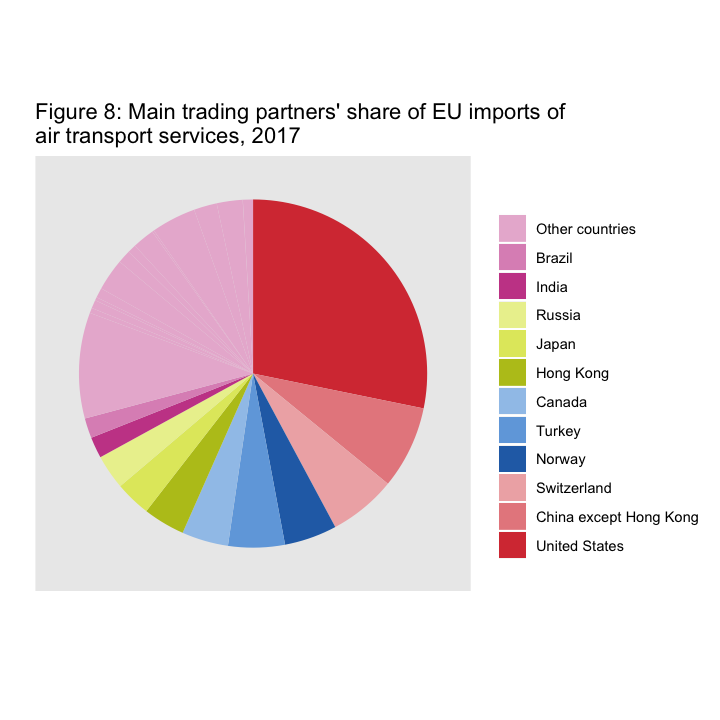

In [269]:
other_ctries_8_2 <- c('IS', 'LI', 'ME', 'MK', 'AL', 'RS', 'AD', 'BY', 'BA', 'MD', 'SM', 'UA', 'VA', 'AFR', 'AG', 'BS', 'BB', 'BQ', 'CU', 'CW', 'DM', 'DO', 'GD', 'HT', 'JM', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'VI', 'BZ', 'CR', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'AR', 'BO', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'MO', 'MN', 'KP', 'KR', 'TW', 'AF', 'BD', 'BT', 'IR', 'MV', 'NP', 'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG', 'TH', 'TL', 'NM', 'AM', 'AZ', 'BH', 'GE', 'IQ', 'IL', 'JO', 'KW', 'LB', 'PS', 'OM', 'QA', 'SA', 'SY', 'AE', 'YE', 'OCE_PLR')

dataset_fig8_2_1 <- get_eurostat_data(id, 
                             filters = list(bop_item="SC2", currency="MIO_EUR", partner= other_ctries_8_2,
                             geo="EU28",stk_flow="DEB"),
                             date_filter = "2017", stringsAsFactors = FALSE)

dataset_fig8_2_1$partner[dataset_fig8_2_1$partner %in% other_ctries_8_2]<-"OT"

main_partners8_2 <- c('HK', 'IN', 'CA','BR', 'TR', 'JP', 'NO', 'RU', 'CN_X_HK', 'CH', 'US')

dataset_fig8_2_2 <- rbind(dataset_fig8_2_1, get_eurostat_data(id, 
                                            filters = list(bop_item="SC2", currency="MIO_EUR", partner=main_partners8_2,
                                            geo="EU28",stk_flow="DEB"),
                                            date_filter = "2017", stringsAsFactors = FALSE))

figure8_2 <- dataset_fig8_2_2 %>% mutate (partner = factor(x=partner, levels=unique(partner))) %>% arrange(match(partner, c('OT', 'BR', 'IN', 'RU', 'JP', 'HK', 'CA', 'TR', 'NO', 'CH', 'CN_X_HK','US')))

figure8_2$partner <- factor(figure8_2$partner, levels = c('OT', 'BR', 'IN', 'RU', 'JP', 'HK', 'CA', 'TR', 'NO', 'CH', 'CN_X_HK','US'))


#Chart! 
options(repr.plot.width=6, repr.plot.height=6)

#Pie
figure8_graph_2 <- ggplot(figure8_2, mapping = aes(x= "", y=values, fill=partner)) +
  geom_bar(stat="identity", width=1) +
#The following line makes this graph a pie chart
  coord_polar("y", start=0) +
#Title
ggtitle("Figure 8: Main trading partners' share of EU imports of 
air transport services, 2017") +

#Below removes the circular coordinate automatically generated when making a pie chart in ggplot
theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid  = element_blank())+

#Axes labels
ylab(" ") +
xlab(" ") 

#Adding the colours
figure8_2_final <- figure8_graph_2 + scale_fill_manual(values=c("#E9B7D4", "#DE93C0", "#C84B96", "#EBf09C", "#E1E86B", "#B9C31E", "#A0C5EA", "#71A8DF", "#276EB4", "#EFB1B3", "#E78A8D", "#D73C41"), labels = c("Other countries", "Brazil", "India", "Russia","Japan","Hong Kong", "Canada", "Turkey", "Norway", "Switzerland", "China except Hong Kong", "United States"),
                                             name = " ")

figure8_2_final

###  Figure 9: Evolution of other modes of transport services trade for EU-28, 2010-2017 (EUR 1 000 million) 

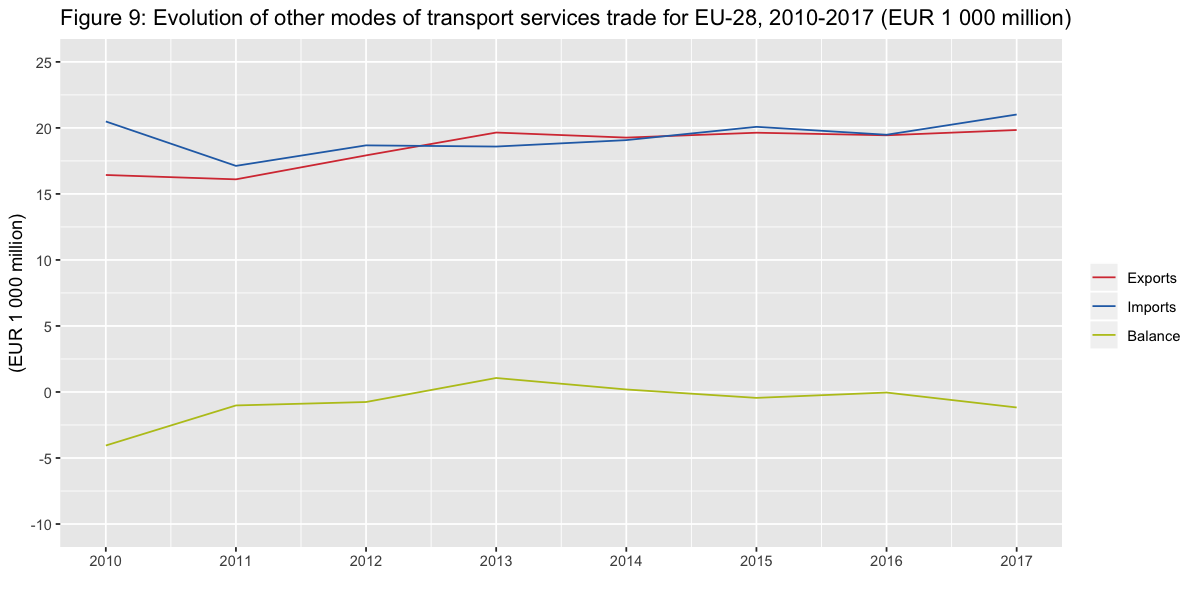

In [238]:
stk_flow_var <- c("CRE", "DEB", "BAL")

dataset_fig9 <- get_eurostat_data(id="bop_its6_det", 
                        filters = list(bop_item="SC3", currency="MIO_EUR", partner="EXT_EU28",geo="EU28",stk_flow=stk_flow_var),
                        date_filter = "2010:2017")

dataset_fig9$time<-as.numeric(as.character(dataset_fig9$time))

dataset_fig9$values<-dataset_fig9$values/1000

dataset_fig9$stk_flow <- factor(dataset_fig9$stk_flow, levels = c("CRE", "DEB", "BAL"))

options(repr.plot.width=10, repr.plot.height=5)

figure9 <- ggplot(data=dataset_fig9, aes(x=time, y=values, group=factor(stk_flow), color=factor(stk_flow))) + 
                      
geom_line() +

scale_color_manual(labels = c("Exports", "Imports", "Balance"), values = c("#D73C41", "#276EB4", "#B9C31E"), name = " ") +


  ggtitle("Figure 9: Evolution of other modes of transport services trade for EU-28, 2010-2017 (EUR 1 000 million)") +
  
  scale_y_continuous(limits = c(-10, 25), breaks = seq(-10, 25, by = 5)) +
  scale_x_continuous(limits = c(2010, 2017), breaks = seq(2010, 2017, by = 1)) +
  
  ylab("(EUR 1 000 million)") +
  xlab(" ")  

print(figure9)




### Figure 10: Main trading partners' share of EU exports and imports of other modes of transport services, 2017 

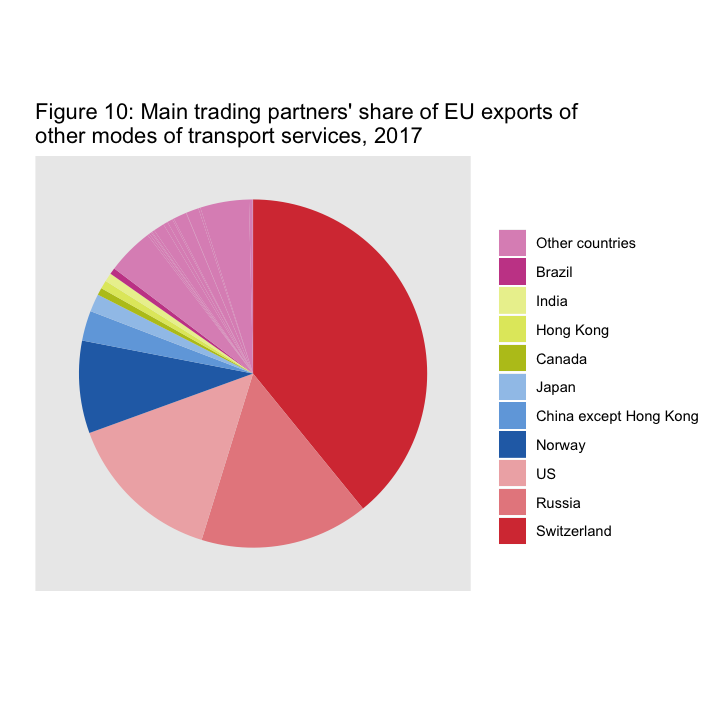

In [277]:
other_ctries_10_1 <- c('IS', 'LI', 'ME', 'MK', 'TR', 'AL', 'TR', 'RS', 'AD', 'BY', 'BA', 'MD', 'SM', 'UA', 'VA', 'AFR', 'AG', 'BS', 'BB', 'BQ', 'CU', 'CW', 'DM', 'DO', 'GD', 'HT', 'JM', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'VI', 'BZ', 'CR', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'AR', 'BO', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'MO', 'MN', 'KP', 'KR', 'TW', 'AF', 'BD', 'BT', 'IR', 'MV', 'NP', 'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG', 'TH', 'TL', 'NM', 'AM', 'AZ', 'BH', 'GE', 'IQ', 'IL', 'JO', 'KW', 'LB', 'PS', 'OM', 'QA', 'SA', 'SY', 'AE', 'YE', 'OCE_PLR')

dataset_fig10_1_1 <- get_eurostat_data(id, 
                             filters = list(bop_item="SC3", currency="MIO_EUR", partner= other_ctries_10_1,
                             geo="EU28",stk_flow="CRE"),
                             date_filter = "2017", stringsAsFactors = FALSE)

dataset_fig10_1_1$partner[dataset_fig10_1_1$partner %in% other_ctries_10_1]<-"OT"

main_partners_10_1 <- c('HK', 'IN', 'CA','BR', 'JP', 'NO', 'RU', 'CN_X_HK', 'CH', 'US')

dataset_fig10_1_2 <- rbind(dataset_fig10_1_1, get_eurostat_data(id, 
                                            filters = list(bop_item="SC3", currency="MIO_EUR", partner=main_partners_10_1,
                                            geo="EU28",stk_flow="CRE"),
                                            date_filter = "2017", stringsAsFactors = FALSE))

figure10_1 <- dataset_fig10_1_2 %>% mutate (partner = factor(x=partner, levels=unique(partner))) %>% arrange(match(partner, c('OT', 'BR', 'IN', 'HK', 'CA', 'JP', 'CN_X_HK', 'NO', 'US', 'RU', 'CH')))

figure10_1$partner <- factor(figure10_1$partner, levels = c('OT', 'BR', 'IN', 'HK', 'CA', 'JP', 'CN_X_HK', 'NO', 'US', 'RU', 'CH'))


#Chart! 
options(repr.plot.width=6, repr.plot.height=6)

#Pie
figure10_graph_1 <- ggplot(figure10_1, mapping = aes(x= "", y=values, fill=partner)) +
  geom_bar(stat="identity", width=1) +
#The following line makes this graph a pie chart
  coord_polar("y", start=0) +
#Title
ggtitle("Figure 10: Main trading partners' share of EU exports of 
other modes of transport services, 2017") +

#Below removes the circular coordinate automatically generated when making a pie chart in ggplot
theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid  = element_blank())+

#Axes labels
ylab(" ") +
xlab(" ") 

#Adding the colours
figure10_1_final <- figure10_graph_1 + scale_fill_manual(values=c("#DE93C0", "#C84B96", "#EBf09C", "#E1E86B", "#B9C31E", "#A0C5EA", "#71A8DF", "#276EB4", "#EFB1B3", "#E78A8D", "#D73C41"), labels = c("Other countries", "Brazil", "India", "Hong Kong", "Canada","Japan","China except Hong Kong", "Norway", "US", "Russia", "Switzerland"),
                                             name = " ")

figure10_1_final

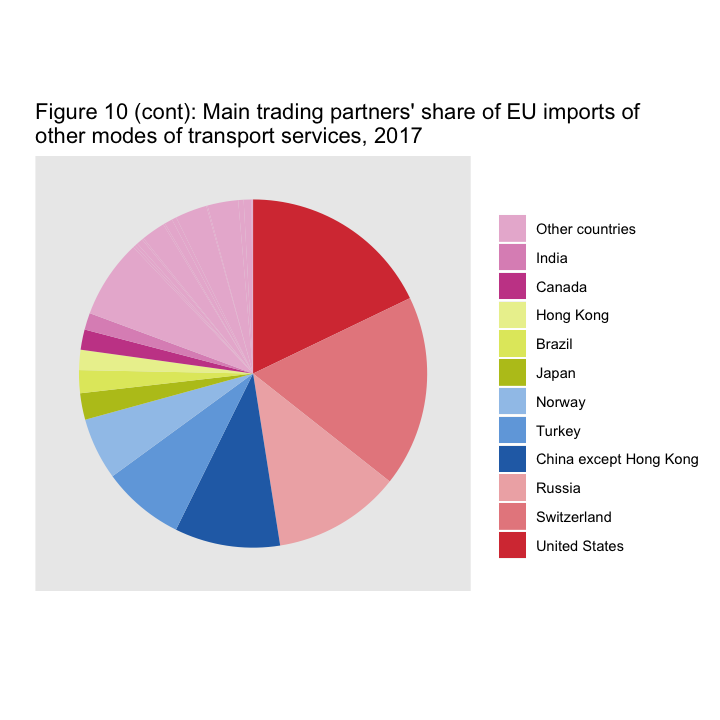

In [281]:
other_ctries10_2 <- c('IS', 'LI', 'ME', 'MK', 'AL', 'RS', 'AD', 'BY', 'BA', 'MD', 'SM', 'UA', 'VA', 'AFR', 'AG', 'BS', 'BB', 'BQ', 'CU', 'CW', 'DM', 'DO', 'GD', 'HT', 'JM', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'VI', 'BZ', 'CR', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'AR', 'BO', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'MO', 'MN', 'KP', 'KR', 'TW', 'AF', 'BD', 'BT', 'IR', 'MV', 'NP', 'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG', 'TH', 'TL', 'NM', 'AM', 'AZ', 'BH', 'GE', 'IQ', 'IL', 'JO', 'KW', 'LB', 'PS', 'OM', 'QA', 'SA', 'SY', 'AE', 'YE', 'OCE_PLR')

dataset_fig10_2_1 <- get_eurostat_data(id, 
                             filters = list(bop_item="SC3", currency="MIO_EUR", partner= other_ctries10_2,
                             geo="EU28",stk_flow="DEB"),
                             date_filter = "2017", stringsAsFactors = FALSE)

dataset_fig10_2_1$partner[dataset_fig10_2_1$partner %in% other_ctries10_2]<-"OT"

main_partners10_2 <- c('HK', 'IN', 'CA', 'TR','BR', 'JP', 'NO', 'RU', 'CN_X_HK', 'CH', 'US')

dataset_fig10_2_2 <- rbind(dataset_fig10_2_1, get_eurostat_data(id, 
                                            filters = list(bop_item="SC3", currency="MIO_EUR", partner=main_partners10_2,
                                            geo="EU28",stk_flow="DEB"),
                                            date_filter = "2017", stringsAsFactors = FALSE))

figure10_2 <- dataset_fig10_2_2 %>% mutate (partner = factor(x=partner, levels=unique(partner))) %>% arrange(match(partner, c('OT', 'IN', 'CA', 'HK', 'BR', 'JP', 'NO', 'TR', 'CN_X_HK', 'RU', 'CH', 'US')))

figure10_2$partner <- factor(figure10_2$partner, levels = c('OT', 'IN', 'CA', 'HK', 'BR', 'JP', 'NO', 'TR', 'CN_X_HK', 'RU', 'CH', 'US'))


#Chart! 
options(repr.plot.width=6, repr.plot.height=6)

#Pie
figure10_graph_2 <- ggplot(figure10_2, mapping = aes(x= "", y=values, fill=partner)) +
  geom_bar(stat="identity", width=1) +
#The following line makes this graph a pie chart
  coord_polar("y", start=0) +
#Title
ggtitle("Figure 10 (cont): Main trading partners' share of EU imports of 
other modes of transport services, 2017") +

#Below removes the circular coordinate automatically generated when making a pie chart in ggplot
theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid  = element_blank())+

#Axes labels
ylab(" ") +
xlab(" ") 

#Adding the colours
figure10_2_final <- figure10_graph_2 + scale_fill_manual(values=c("#E9B7D4", "#DE93C0", "#C84B96", "#EBf09C", "#E1E86B", "#B9C31E", "#A0C5EA", "#71A8DF", "#276EB4", "#EFB1B3", "#E78A8D", "#D73C41"), labels = c("Other countries", "India", "Canada", "Hong Kong", "Brazil","Japan","Norway", "Turkey", "China except Hong Kong", "Russia", "Switzerland", "United States"),
                                             name = " ")

figure10_2_final

### Figure 11: Evolution of postal and courier services trade for EU-28, 2010-2017 (EUR 1 000 million) 

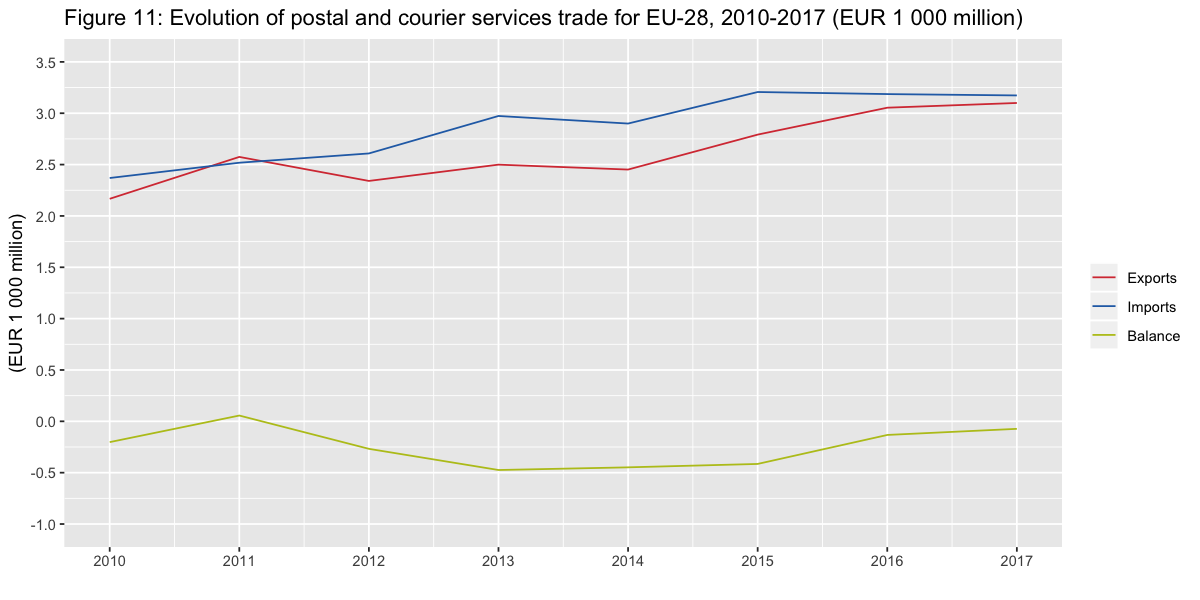

In [239]:
stk_flow_var <- c("CRE", "DEB", "BAL")

dataset_fig11 <- get_eurostat_data(id="bop_its6_det", 
                        filters = list(bop_item="SC4", currency="MIO_EUR", partner="EXT_EU28",geo="EU28",stk_flow=stk_flow_var),
                        date_filter = "2010:2017")

dataset_fig11$time<-as.numeric(as.character(dataset_fig11$time))

dataset_fig11$values<-dataset_fig11$values/1000

dataset_fig11$stk_flow <- factor(dataset_fig11$stk_flow, levels = c("CRE", "DEB", "BAL"))

options(repr.plot.width=10, repr.plot.height=5)

figure11 <- ggplot(data=dataset_fig11, aes(x=time, y=values, group=factor(stk_flow), color=factor(stk_flow))) + 
                      
geom_line() +

scale_color_manual(labels = c("Exports", "Imports", "Balance"), values = c("#D73C41", "#276EB4", "#B9C31E"), name = " ") +


  ggtitle("Figure 11: Evolution of postal and courier services trade for EU-28, 2010-2017 (EUR 1 000 million)") +
  
  scale_y_continuous(limits = c(-1.0, 3.5), breaks = seq(-1.0, 3.5, by = 0.5)) +
  scale_x_continuous(limits = c(2010, 2017), breaks = seq(2010, 2017, by = 1)) +
  
  ylab("(EUR 1 000 million)") +
  xlab(" ")  

print(figure11)



### Figure 12: Main trading partners' share of EU exports and imports of postal and courier services, 2017 

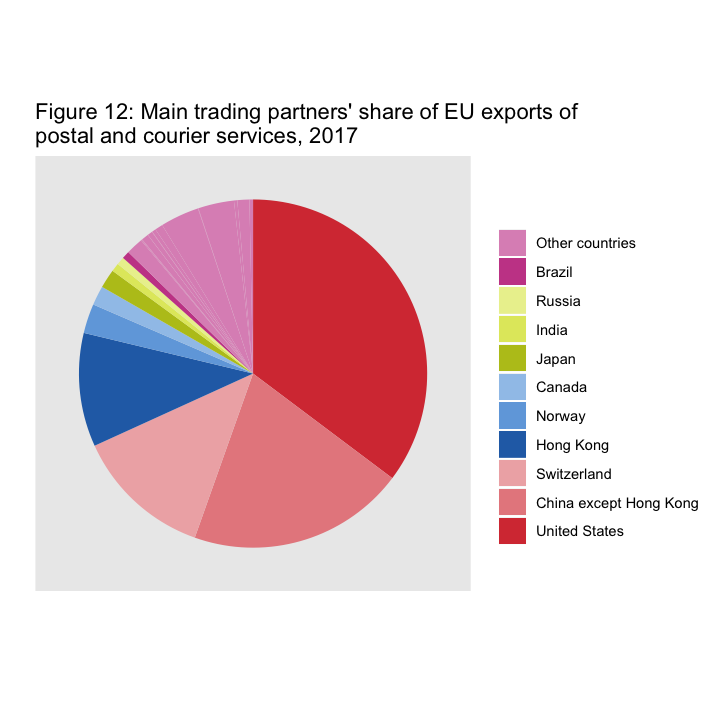

In [248]:
other_ctries_12_1 <- c('IS', 'LI', 'ME', 'MK', 'TR', 'AL', 'RS', 'AD', 'BY', 'BA', 'MD', 'SM', 'UA', 'VA', 'AFR', 'AG', 'BS', 'BB', 'BQ', 'CU', 'CW', 'DM', 'DO', 'GD', 'HT', 'JM', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'VI', 'BZ', 'CR', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'AR', 'BO', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'MO', 'MN', 'KP', 'KR', 'TW', 'AF', 'BD', 'BT', 'IR', 'MV', 'NP', 'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG', 'TH', 'TL', 'NM', 'AM', 'AZ', 'BH', 'GE', 'IQ', 'IL', 'JO', 'KW', 'LB', 'PS', 'OM', 'QA', 'SA', 'SY', 'AE', 'YE', 'OCE_PLR')

dataset_fig12_1 <- get_eurostat_data(id, 
                             filters = list(bop_item="SC4", currency="MIO_EUR", partner= other_ctries_12_1,
                             geo="EU28",stk_flow="CRE"),
                             date_filter = "2017", stringsAsFactors = FALSE)

dataset_fig12_1$partner[dataset_fig12_1$partner %in% other_ctries_12_1]<-"OT"

main_partners_12 <- c('OT', 'BR', 'RU', 'IN', 'JP', 'CA', 'NO', 'HK', 'CH', 'CN_X_HK','US')

dataset_fig12_1_2 <- rbind(dataset_fig12_1, get_eurostat_data(id, 
                                            filters = list(bop_item="SC4", currency="MIO_EUR", partner=main_partners_12,
                                            geo="EU28",stk_flow="CRE"),
                                            date_filter = "2017", stringsAsFactors = FALSE))

figure12_1 <- dataset_fig12_1_2 %>% mutate (partner = factor(x=partner, levels=unique(partner))) %>% arrange(match(partner, c('OT', 'BR', 'RU', 'IN', 'JP', 'CA', 'NO', 'HK', 'CH', 'CN_X_HK','US')))

figure12_1$partner <- factor(figure12_1$partner, levels = c('OT', 'BR', 'RU', 'IN', 'JP', 'CA', 'NO', 'HK', 'CH', 'CN_X_HK','US'))


#Chart! 
options(repr.plot.width=6, repr.plot.height=6)

#Pie
figure12_graph <- ggplot(figure12_1, mapping = aes(x= "", y=values, fill=partner)) +
  geom_bar(stat="identity", width=1) +
#The following line makes this graph a pie chart
  coord_polar("y", start=0) +
#Title
ggtitle("Figure 12: Main trading partners' share of EU exports of 
postal and courier services, 2017") +

#Below removes the circular coordinate automatically generated when making a pie chart in ggplot
theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid  = element_blank())+

#Axes labels
ylab(" ") +
xlab(" ") 

#Adding the colours
figure12_final <- figure12_graph + scale_fill_manual(values=c("#DE93C0", "#C84B96", "#EBf09C", "#E1E86B", "#B9C31E", "#A0C5EA", "#71A8DF", "#276EB4", "#EFB1B3", "#E78A8D", "#D73C41"), labels = c("Other countries", "Brazil", "Russia", "India", "Japan","Canada","Norway", "Hong Kong", "Switzerland", "China except Hong Kong", "United States"),
                                             name = " ")

figure12_final

### Figure 12 (cont): Main trading partners' share of EU imports of postal and courier services, 2017 

currency,bop_item,stk_flow,partner,geo,time,values
<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<dbl>
MIO_EUR,SC4,DEB,OT,EU28,2017,40.2
MIO_EUR,SC4,DEB,OT,EU28,2017,0.6
MIO_EUR,SC4,DEB,OT,EU28,2017,1.2
MIO_EUR,SC4,DEB,OT,EU28,2017,8.1
MIO_EUR,SC4,DEB,OT,EU28,2017,3.4
MIO_EUR,SC4,DEB,OT,EU28,2017,8.5
MIO_EUR,SC4,DEB,OT,EU28,2017,0.0
MIO_EUR,SC4,DEB,OT,EU28,2017,7.5
MIO_EUR,SC4,DEB,OT,EU28,2017,4.0


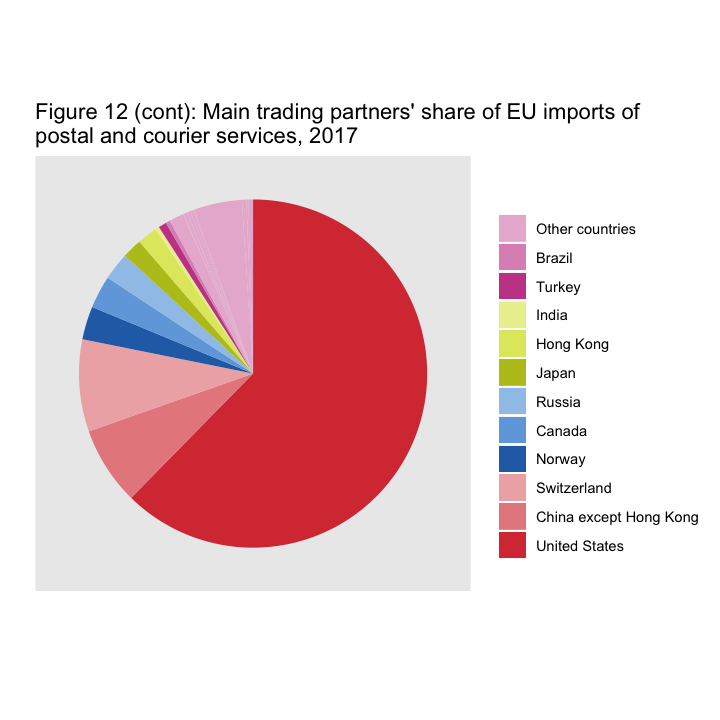

In [253]:
other_ctries_12_2 <- c('IS', 'LI', 'ME', 'MK', 'AL', 'RS', 'AD', 'BY', 'BA', 'MD', 'SM', 'UA', 'VA', 'AFR', 'AG', 'BS', 'BB', 'BQ', 'CU', 'CW', 'DM', 'DO', 'GD', 'HT', 'JM', 'KN', 'LC', 'VC', 'SX', 'TT', 'TC', 'VI', 'BZ', 'CR', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'AR', 'BO', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'MO', 'MN', 'KP', 'KR', 'TW', 'AF', 'BD', 'BT', 'IR', 'MV', 'NP', 'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG', 'TH', 'TL', 'NM', 'AM', 'AZ', 'BH', 'GE', 'IQ', 'IL', 'JO', 'KW', 'LB', 'PS', 'OM', 'QA', 'SA', 'SY', 'AE', 'YE', 'OCE_PLR')

dataset_fig12_2 <- get_eurostat_data(id, 
                             filters = list(bop_item="SC4", currency="MIO_EUR", partner= other_ctries_12_2,
                             geo="EU28",stk_flow="DEB"),
                             date_filter = "2017", stringsAsFactors = FALSE)

dataset_fig12_2$partner[dataset_fig12_2$partner %in% other_ctries_12_2]<-"OT"

main_partners_12_2 <- c('OT', 'BR', 'TR', 'IN', 'HK', 'JP', 'RU', 'CA', 'NO', 'CH', 'CN_X_HK', 'US')

dataset_fig12_2_2 <- rbind(dataset_fig12_2, get_eurostat_data(id, 
                                            filters = list(bop_item="SC4", currency="MIO_EUR", partner=main_partners_12_2,
                                            geo="EU28",stk_flow="DEB"),
                                            date_filter = "2017", stringsAsFactors = FALSE))

figure12_2 <- dataset_fig12_2_2 %>% mutate (partner = factor(x=partner, levels=unique(partner))) %>% arrange(match(partner, c('OT', 'BR', 'TR', 'IN', 'HK', 'JP', 'RU', 'CA', 'NO', 'CH', 'CN_X_HK', 'US')))
figure12_2$partner <- factor(figure12_2$partner, levels = c('OT', 'BR', 'TR', 'IN', 'HK', 'JP', 'RU', 'CA', 'NO', 'CH', 'CN_X_HK', 'US'))

figure12_2

#Chart! 
options(repr.plot.width=6, repr.plot.height=6)

#Pie
figure12_2_graph <- ggplot(figure12_2, mapping = aes(x= "", y=values, fill=partner)) +
  geom_bar(stat="identity", width=1) +
#The following line makes this graph a pie chart
  coord_polar("y", start=0) +
#Title
ggtitle("Figure 12 (cont): Main trading partners' share of EU imports of 
postal and courier services, 2017") +

#Below removes the circular coordinate automatically generated when making a pie chart in ggplot
theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid  = element_blank())+

#Axes labels
ylab(" ") +
xlab(" ") 

#Adding the colours
figure12_2_final <- figure12_2_graph + scale_fill_manual(values=c("#E9B7D4", "#DE93C0", "#C84B96", "#EBf09C", "#E1E86B", "#B9C31E", "#A0C5EA", "#71A8DF", "#276EB4", "#EFB1B3", "#E78A8D", "#D73C41"), labels = c("Other countries", "Brazil", "Turkey", "India", "Hong Kong","Japan","Russia", "Canada", "Norway", "Switzerland", "China except Hong Kong", "United States"),
                                             name = " ")

figure12_2_final